In [1]:
# SOURCE for this project is: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/
# https://colab.research.google.com/drive/1tdkpKPjUtj_Aq8ponvzd8H4dx1-fSRkv?usp=sharing#scrollTo=Wk5I4XJH5z_x


# Get images from here: https://www.cs.cmu.edu/afs/cs/project/vision/vasc/idb/www/html/face/

In [2]:


# USAGE
# python non-maximum-suppression-case-study.py --image ../images/beach.png
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html

import os
import argparse
import pathlib
from typing import Union, Any

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
# print(current_folder)

# /Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/practical_python_and_opencv_case_studies/face_detection/images/obama.png
# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/practical_python_and_opencv_case_studies/face_detection/images/obama.png").resolve()

# print(args["image"])

assert args["image"].exists()

# SOURCE: http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html
def showImage(img):
    # plt.axis('off')
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    temp_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
    display(Image.fromarray(temp_image))

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

try:
    xrange
except NameError:
    xrange = range


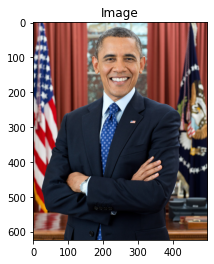

In [3]:
# # In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# # As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
# display(Image.fromarray(temp_image))

# image.shape

# show the output image
plt_imshow("Image", image)

In [4]:
#  Felzenszwalb et al.
def non_max_suppression_slow(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # initialize the list of picked indexes
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    # We apply np.argsort to grab the indexes of the sorted 
    # coordinates of the bottom-right y-coordinate of the 
    # bounding boxes. 
    # It is absolutely critical that we sort 
    # according to the bottom-right corner as we’ll 
    # need to compute the overlap ratio of other 
    # bounding boxes later in this function.
    idxs = np.argsort(y2)
    
    # ------------------------------------------------
    # Non-Maximum Suppression for Object Detection in Python
    # ------------------------------------------------
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list, add the index
        # value to the list of picked indexes, then initialize
        # the suppression list (i.e. indexes that will be deleted)
        # using the last index
        last = len(idxs) - 1
        # grab the value of the last entry in the idx list
        i = idxs[last]
        # append the index i to our list of bounding boxes to keep on
        pick.append(i)
        #  finally initialize our suppress list (the list of boxes we want to ignore) with index of the last entry of the index list
        suppress = [last]
        
        # ------------------------------------------------
        # Here we start looping over the (remaining) indexes in the idx list on Line 37, grabbing the value of the current index on Line 39.
        # loop over all indexes in the indexes list
        # ------------------------------------------------
        for pos in xrange(0, last):
            # grab the current index
            j = idxs[pos]
            # find the largest (x, y) coordinates for the start of
            # the bounding box and the smallest (x, y) coordinates
            # for the end of the bounding box
            xx1 = max(x1[i], x1[j])
            yy1 = max(y1[i], y1[j])
            xx2 = min(x2[i], x2[j])
            yy2 = min(y2[i], y2[j])
            # compute the width and height of the bounding box
            w = max(0, xx2 - xx1 + 1)
            h = max(0, yy2 - yy1 + 1)
            # compute the ratio of overlap between the computed
            # bounding box and the bounding box in the area list
            overlap = float(w * h) / area[j]
            # if there is sufficient overlap, suppress the
            # current bounding box
            if overlap > overlapThresh:
                suppress.append(pos)
        # delete all indexes from the index list that are in the
        # suppression list
        idxs = np.delete(idxs, suppress)
    # return only the bounding boxes that were picked
    return boxes[pick]


[x] 6 initial bounding boxes
[x] after applying non-maximum, 1 bounding boxes


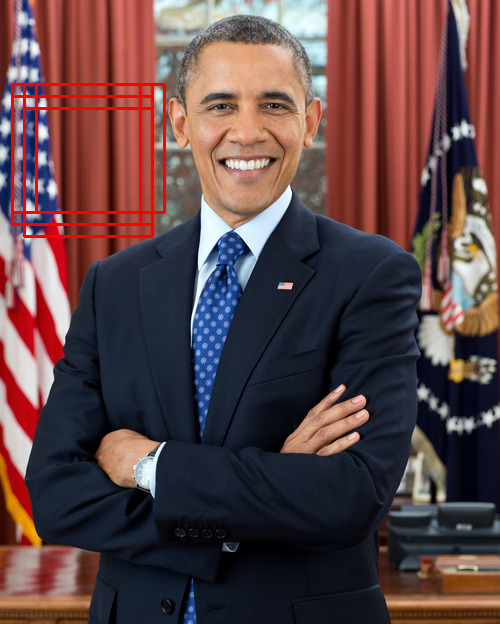

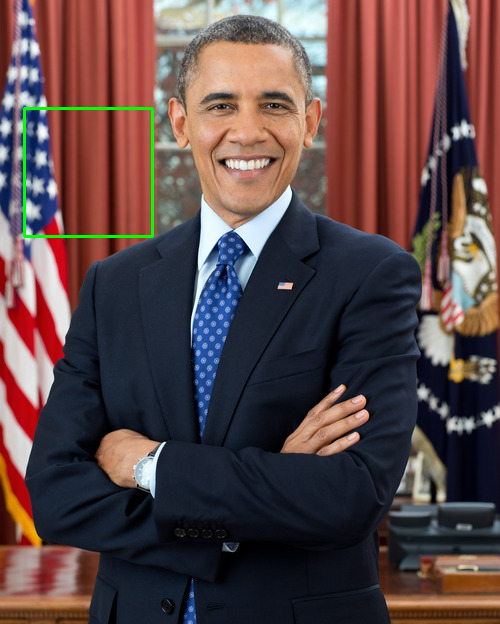

In [5]:
# construct a list containing the images that will be examined
# along with their respective bounding boxes
# TODO: Find an image that actually produces multiple bounding boxes.
images = [
    (f"{args['image']}", np.array([
    (12, 84, 140, 212),
    (24, 84, 152, 212),
    (36, 84, 164, 212),
    (12, 96, 140, 224),
    (24, 96, 152, 224),
    (24, 108, 152, 236)])),
#     ("images/bksomels.jpg", np.array([
#     (114, 60, 178, 124),
#     (120, 60, 184, 124),
#     (114, 66, 178, 130)])),
#     ("images/gpripe.jpg", np.array([
#     (12, 30, 76, 94),
#     (12, 36, 76, 100),
#     (72, 36, 200, 164),
#     (84, 48, 212, 176)]))
]
# loop over the images
for (imagePath, boundingBoxes) in images:
    # load the image and clone it
    print(f"[x] {len(boundingBoxes)} initial bounding boxes")
    image = cv2.imread(imagePath)
    orig = image.copy()
    # loop over the bounding boxes for each image and draw them
    for (startX, startY, endX, endY) in boundingBoxes:
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)
    # perform non-maximum suppression on the bounding boxes
    pick = non_max_suppression_slow(boundingBoxes, 0.3)
    print(f"[x] after applying non-maximum, {len(pick)} bounding boxes")
    # loop over the picked bounding boxes and draw them
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    # display the images
    
    # In Pillow, the order of colors is assumed to be RGB (red, green, blue).
    # As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
    # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
    # display(Image.fromarray(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)))
    # display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
    
    showImage(orig)
    showImage(image)
    
    # cv2.imshow("Original", orig)
    # cv2.imshow("After NMS", image)
    # cv2.waitKey(0)

# Interest Points

http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html

Sometimes, we don’t know what we’re looking for in an image. Low-level image characteristics, however, often correspond to the interesting area of images. There are many common techniques for identifying interesting areas of an image, even ones that estimate visual saliency. Shi-Tomasi’s Good Features To Track is one technique commonly used to indicate interest points in an image. Detecting these interest points is also relatively simple using OpenCv:

# Product Detection

source: http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html

Other times, we know a specific product is in an image and we want to make sure we don’t crop it out. We can achieve this by localizing an image of the product in our image of interest.

In our example, the product is:

We can locate the product in the image using instance retrieval techniques. First, we’ll estimate the transformation between the product and the target image:

